In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,5)
sns.set_style("whitegrid")


In [4]:
# Load dataset
df = pd.read_csv("../data/raw/dataset_40000_rows.csv")

# Display first 5 rows
df.head()


C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_18280\2261807375.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/dataset_40000_rows.csv")


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,9/19/2023,2023-08,9/19/2023,2,1,2,0,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,5/14/2014,2008-01,5/14/2014,2,1,2,0,0,0,0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,7/23/2014,2011-08,7/23/2014,2,1,2,0,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,4/25/2018,2009-10,5/14/2014,0,1,1,0,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,4/9/2018,2017-03,6/9/2018,0,1,1,0,0,0,0


In [5]:
rows, cols = df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {cols}")


Number of Rows: 39212
Number of Columns: 289


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39212 entries, 0 to 39211
Columns: 289 entries, rowid to pl_ndispec
dtypes: float64(235), int64(26), object(28)
memory usage: 86.5+ MB


In [7]:
selected_columns = [
    "pl_rade",      # Planet radius (Earth radii)
    "pl_bmasse",    # Planet mass (Earth mass)
    "pl_orbper",    # Orbital period (days)
    "pl_eqt",       # Equilibrium temperature (K)
    "st_teff",      # Host star temperature (K)
    "st_lum",       # Stellar luminosity
    "st_rad"        # Stellar radius
]

df_selected = df[selected_columns]
df_selected.head()


,pl_rade,pl_bmasse,pl_orbper,pl_eqt,st_teff,st_lum,st_rad
0,NaN,4914.898486,323.21000,NaN,4874.0,1.97823,13.76
1,NaN,6165.600000,326.03000,NaN,4742.0,2.24300,19.00
2,NaN,5434.700000,NaN,NaN,NaN,NaN,NaN
3,NaN,3337.070000,516.22000,NaN,4340.0,NaN,24.08
4,NaN,4684.814200,516.21997,NaN,4213.0,NaN,29.79


pl_rade      12180
pl_bmasse    32119
pl_orbper     3291
pl_eqt       22020
st_teff       3485
st_lum       29562
st_rad        3255
dtype: int64


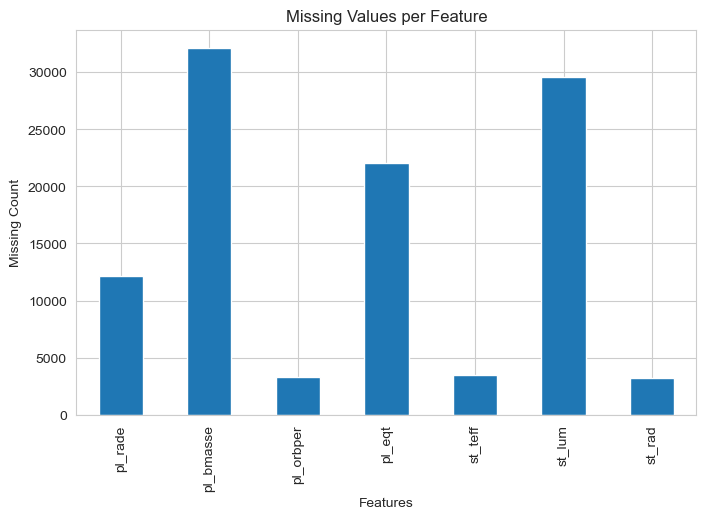

In [8]:
# Missing value count
missing_values = df_selected.isnull().sum()
print(missing_values)

# Plot missing values
missing_values.plot(kind="bar")
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Missing Count")
plt.show()


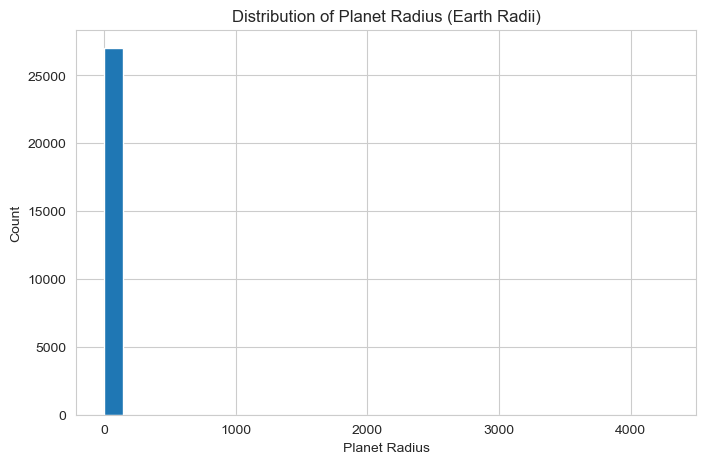

In [9]:
df_selected["pl_rade"].dropna().hist(bins=30)
plt.title("Distribution of Planet Radius (Earth Radii)")
plt.xlabel("Planet Radius")
plt.ylabel("Count")
plt.show()
#Visualize the distribution of planet sizes to understand scale variation.

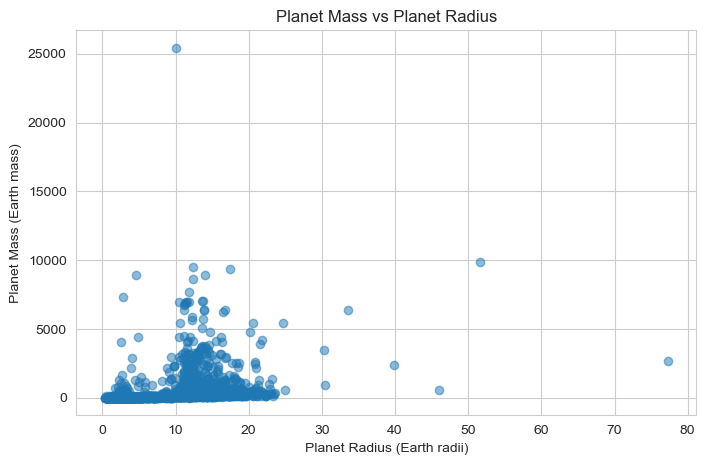

In [10]:
plt.scatter(df_selected["pl_rade"], df_selected["pl_bmasse"], alpha=0.5)
plt.xlabel("Planet Radius (Earth radii)")
plt.ylabel("Planet Mass (Earth mass)")
plt.title("Planet Mass vs Planet Radius")
plt.show()
#Study the physical relationship between planet mass and radius.

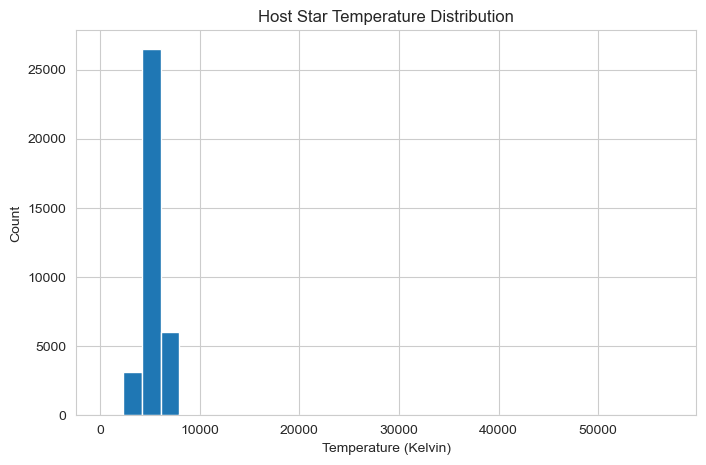

In [11]:
df_selected["st_teff"].dropna().hist(bins=30)
plt.title("Host Star Temperature Distribution")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Count")
plt.show()
#Analyze stellar temperature distribution influencing habitability.


pl_rade      12180
pl_bmasse    32119
pl_orbper     3291
pl_eqt       22020
st_teff       3485
st_lum       29562
st_rad        3255
dtype: int64


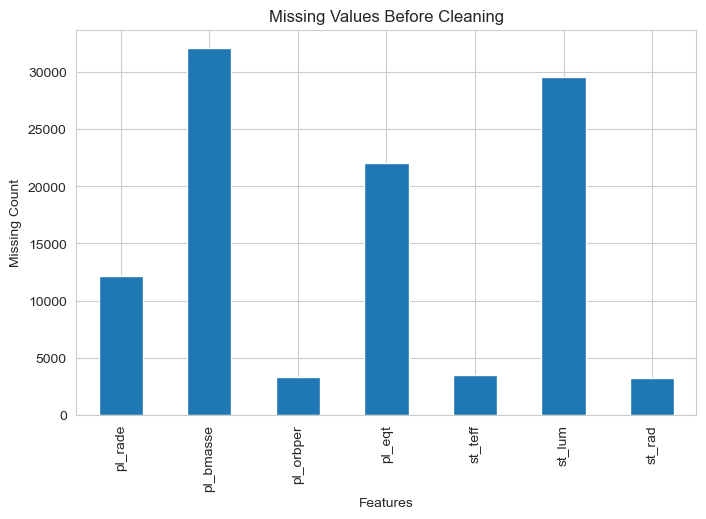

In [12]:
#------------------------------------WEEK2-------------------------
missing = df_selected.isnull().sum()
print(missing)

missing.plot(kind="bar")
plt.title("Missing Values Before Cleaning")
plt.xlabel("Features")
plt.ylabel("Missing Count")
plt.show()


In [13]:
df_filled = df_selected.copy()

for col in df_filled.columns:
    df_filled[col].fillna(df_filled[col].median(), inplace=True)

df_filled.isnull().sum()


C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_18280\3238275409.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].median(), inplace=True)


pl_rade      0
pl_bmasse    0
pl_orbper    0
pl_eqt       0
st_teff      0
st_lum       0
st_rad       0
dtype: int64

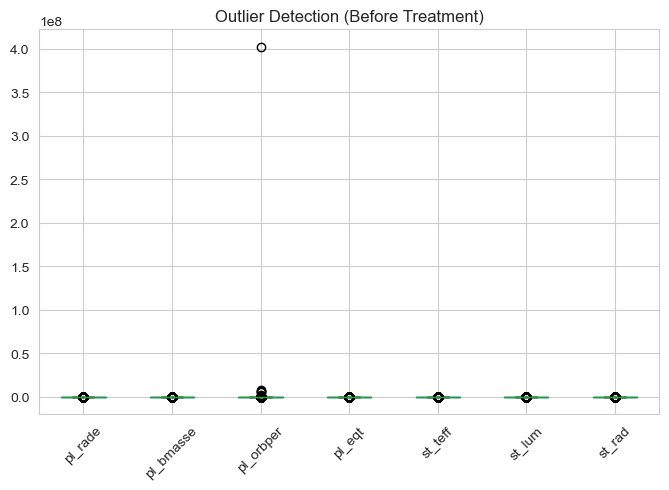

In [14]:
df_filled.boxplot(rot=45)
plt.title("Outlier Detection (Before Treatment)")
plt.show()


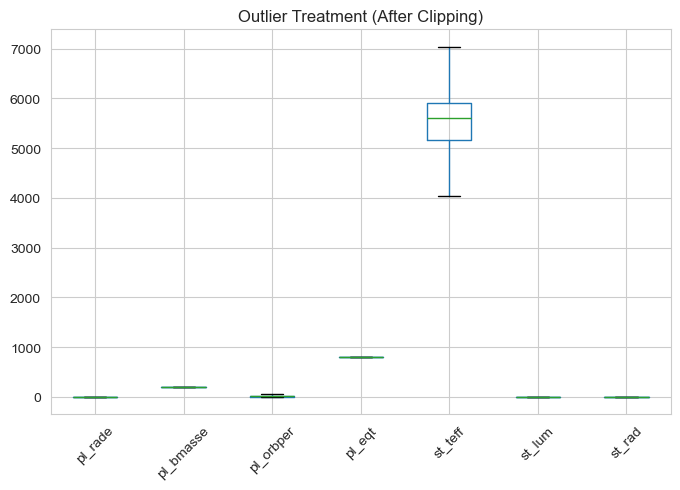

In [15]:
import numpy as np

df_cleaned = df_filled.copy()

for col in df_cleaned.columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned[col] = np.clip(df_cleaned[col], lower, upper)

df_cleaned.boxplot(rot=45)
plt.title("Outlier Treatment (After Clipping)")
plt.show()
#Limit extreme values using the Interquartile Range method.


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_cleaned),
    columns=df_cleaned.columns
)

df_scaled.head()
#Normalize numerical features so all variables contribute equally.


,pl_rade,pl_bmasse,pl_orbper,pl_eqt,st_teff,st_lum,st_rad
0,0.502273,0.0,1.000000,0.0,0.277406,0.0,1.000000
1,0.502273,0.0,1.000000,0.0,0.233289,0.0,1.000000
2,0.502273,0.0,0.197147,0.0,0.524398,0.0,0.475553
3,0.502273,0.0,1.000000,0.0,0.098930,0.0,1.000000
4,0.502273,0.0,1.000000,0.0,0.056484,0.0,1.000000


In [17]:
df_scaled["habitability_score"] = (
    (1 - abs(df_scaled["pl_eqt"] - 0.5)) * 0.5 +
    (1 - abs(df_scaled["pl_rade"] - 0.5)) * 0.5
)

df_scaled[["pl_eqt", "pl_rade", "habitability_score"]].head()
#Compute a habitability score using planet temperature and size.

,pl_eqt,pl_rade,habitability_score
0,0.0,0.502273,0.748864
1,0.0,0.502273,0.748864
2,0.0,0.502273,0.748864
3,0.0,0.502273,0.748864
4,0.0,0.502273,0.748864


In [18]:
df_scaled["stellar_compatibility"] = (
    (1 - abs(df_scaled["st_teff"] - 0.5)) * 0.6 +
    (1 - abs(df_scaled["st_lum"] - 0.5)) * 0.4
)

df_scaled[["st_teff", "st_lum", "stellar_compatibility"]].head()
#Measure host star suitability using temperature and luminosity.

,st_teff,st_lum,stellar_compatibility
0,0.277406,0.0,0.666444
1,0.233289,0.0,0.639973
2,0.524398,0.0,0.785361
3,0.098930,0.0,0.559358
4,0.056484,0.0,0.533890


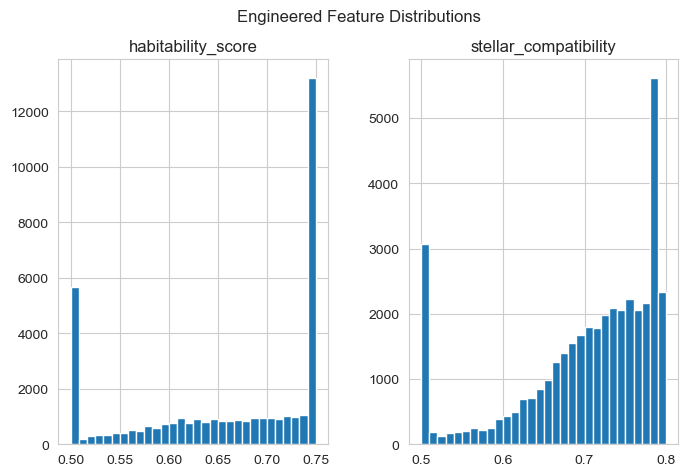

In [19]:
df_scaled[["habitability_score", "stellar_compatibility"]].hist(bins=30)
plt.suptitle("Engineered Feature Distributions")
plt.show()
#Validate newly created features using histograms.

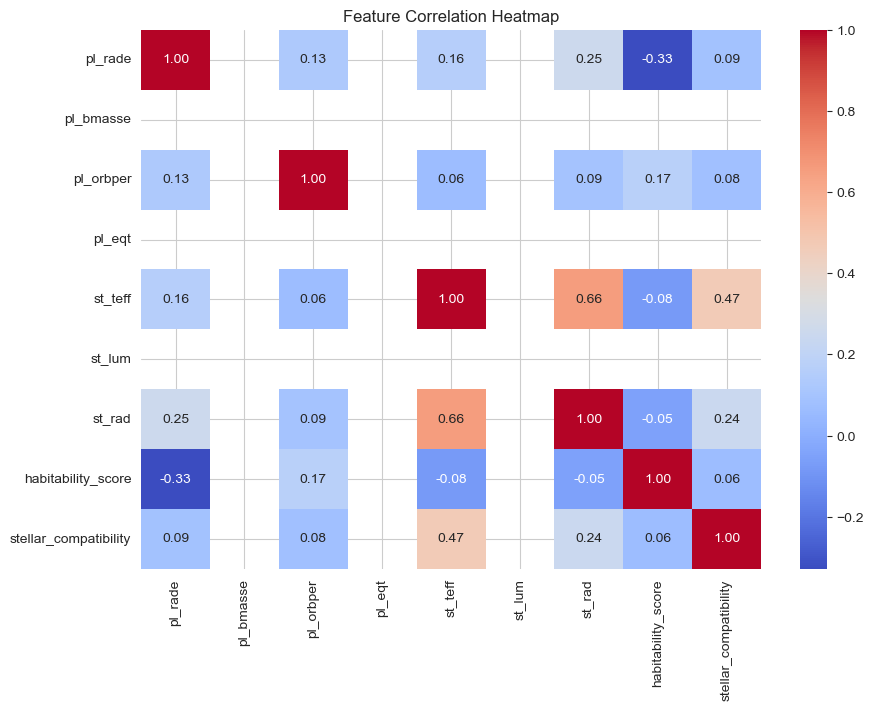

In [21]:
#-----------------WEEK3---------------
#Analyze correlations to understand feature relationships and redundancy.

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_scaled.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
#Convert habitability score into a binary classification target.

# Define threshold for habitability
df_scaled["habitable"] = (df_scaled["habitability_score"] >= 0.6).astype(int)

df_scaled[["habitability_score", "habitable"]].head()

,habitability_score,habitable
0,0.748864,1
1,0.748864,1
2,0.748864,1
3,0.748864,1
4,0.748864,1


In [23]:
#Split dataset into input features and prediction target.

X = df_scaled.drop(columns=["habitability_score", "habitable"])
y = df_scaled["habitable"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (39212, 8)
y shape: (39212,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)
#Split data into training and testing sets to evaluate model performance.

Training set: (31369, 8)
Testing set: (7843, 8)


pl_rade                  0.914065
pl_orbper                0.042473
st_rad                   0.019324
st_teff                  0.013270
stellar_compatibility    0.010868
pl_bmasse                0.000000
pl_eqt                   0.000000
st_lum                   0.000000
dtype: float64


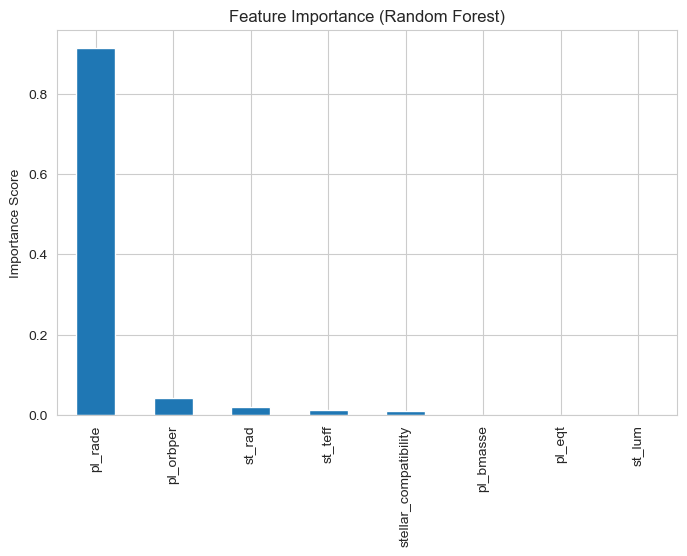

In [25]:
#Identify most influential features affecting habitability.

from sklearn.ensemble import RandomForestClassifier

rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)

importances = pd.Series(
    rf_temp.feature_importances_, index=X.columns
).sort_values(ascending=False)

print(importances)

importances.plot(kind="bar")
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

In [26]:
#Retain only the most relevant features for final ML models.

selected_features = importances[importances > 0.05].index.tolist()
print("Selected Features:", selected_features)

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

X_train_sel.head()

Selected Features: ['pl_rade']


,pl_rade
29462,0.435606
23533,0.778939
4244,0.365909
2437,0.502273
38331,0.502273


In [27]:
#Create a pipeline to ensure consistent preprocessing during training and testing.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler())
])

X_train_final = pipeline.fit_transform(X_train_sel)
X_test_final = pipeline.transform(X_test_sel)

X_train_final.shape

(31369, 1)

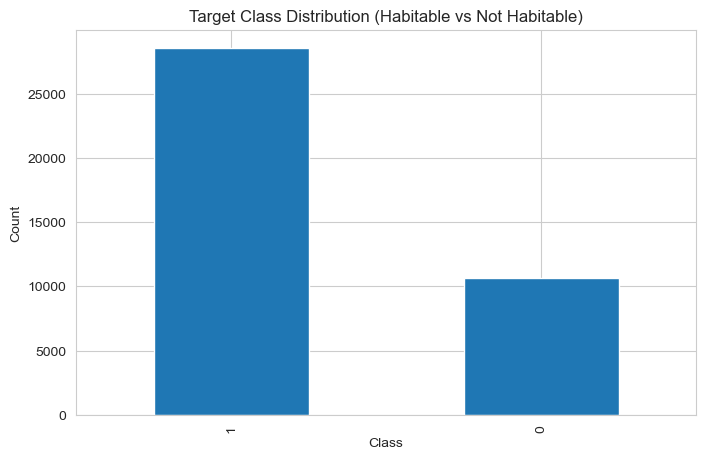

habitable
1    28539
0    10673
Name: count, dtype: int64

In [28]:
#Check class distribution to avoid biased model training.

y.value_counts().plot(kind="bar")
plt.title("Target Class Distribution (Habitable vs Not Habitable)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

y.value_counts()
